<a href="https://colab.research.google.com/github/DanyPao/DataScience2/blob/main/Primera_Preentrega_Daniela_Esposito_Smoker_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Proyecto: Smoker Status Prediction**

Data Science II ~ Primera pre-entrega


##Datos:

####Alumna: Daniela Paola Espósito
####Comisión: 61145
####Docente: David Silvera
####Tutora: María Soledad Gutiérrez


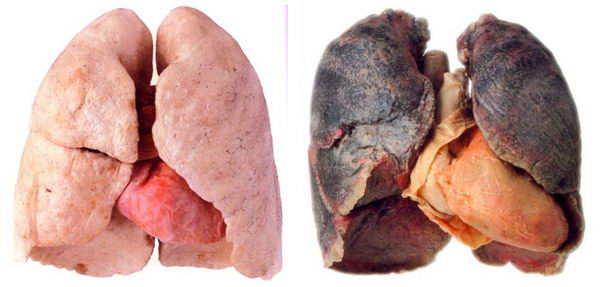

##Introducción:
#####Según la Organización Mundial de la Salud (OMS), el tabaco es la primera causa evitable de enfermedad, invalidez y muerte prematura en el mundo.
#####El tabaquismo es la causa de...


- Más del 90% de los casos de bronquitis.
- Del 95% de los casos de cáncer de pulmón.
- Del 30% de todas las cardiopatías coronarias.
- Parte importante de los casos de cáncer de esófago, vejiga urinaria, cavidad bucal y laringe.(1)

#####Por todo lo anterior, es de gran importancia poder detectar si una persona es fumadora o no, a través de estudios de rutina.

#####Muchas veces por diversas razones, los pacientes no son sinceros o entran en una emergencia sin posibilidad de preguntar si fuma o no, y por lo tanto, cuando el médico no tiene los datos justos, no puede diagnosticar correctamente.

#####Si con este modelo se logra predicir el tabaquismo de una persona, no importará si se sabe o no, si esa persona fuma para que el medico pueda diagnosticar eficazmente.

###Objetivo

El objetivo de este proyecto es poder si crear un modelo que pueda predecir el estado de tabaquismo de un individuo utilizando bioseñales.

###Hipótesis

Un modelo de aprendizaje automático será capaz de clasificar con precisión las instancias en diferentes categorías basadas en los siguientes atributos:

- "Fuma"

- "No Fuma"

###Preguntas:

- ¿Qué marcadores biológicos están relacionados con el tabaquismo?
- ¿Hay alguna bioseñal que por si sola pueda indicar si es fumador?
- ¿Qué indicadores combinados pueden predecir si padece tabaquismo?


##EDA y Data Wrangling

###Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
!pip install dataprep
from dataprep.eda import create_report

import warnings
warnings.filterwarnings('ignore')

cmap=colors.ListedColormap('RdBu_r')

###Carga de datos

In [2]:
url = 'https://raw.githubusercontent.com/DanyPao/DataScience2/main/train_dataset.csv'
df = pd.read_csv(url)

In [3]:
df.head()

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
0   35         170          85       97.0             0.9              0.9   
1   20         175         110      110.0             0.7              0.9   
2   45         155          65       86.0             0.9              0.9   
3   45         165          80       94.0             0.8              0.7   
4   20         165          60       81.0             1.5              0.1   

   hearing(left)  hearing(right)  systolic  relaxation  ...  HDL  LDL  \
0              1               1       118          78  ...   70  142   
1              1               1       119          79  ...   71  114   
2              1               1       110          80  ...   57  112   
3              1               1       158          88  ...   46   91   
4              1               1       109          64  ...   47   92   

   hemoglobin  Urine protein  serum creatinine   AST   ALT  Gtp  \
0        19.8              1               1.0    61   115  125   
1        15.9              1               1.1    19    25   30   
2        13.7              3               0.6  1090  1400  276   
3        16.9              1               0.9    32    36   36   
4        14.9              1               1.2    26    28   15   

   dental caries  smoking  
0              1        1  
1              1        0  
2              0        0  
3              0        0  
4              0        0  

[5 rows x 23 columns]

###Normalización

######Traducción de variables

In [4]:
df=df.rename(columns={'age':'edad','height(cm)':'altura','weight(kg)':'peso','waist(cm)':'cintura','eyesight(left)':'vista_izq','eyesight(right)':'vista_der','hearing(left)':'audicion_izq','hearing(right)':'audicion_der','systolic':'sistolica','relaxation':'diastolica','fasting blood sugar':'glucosa','Cholesterol':'colesterol','triglyceride':'trigliceridos','hemoglobin':'hemoglobina','Urine protein':'proteina_orina','serum creatinine':'creatinina','dental caries':'caries_dental','smoking':'fumador'})

In [5]:
df.columns

Index(['edad', 'altura', 'peso', 'cintura', 'vista_izq', 'vista_der',
       'audicion_izq', 'audicion_der', 'sistolica', 'diastolica', 'glucosa',
       'colesterol', 'trigliceridos', 'HDL', 'LDL', 'hemoglobina',
       'proteina_orina', 'creatinina', 'AST', 'ALT', 'Gtp', 'caries_dental',
       'fumador'],
      dtype='object')

###Descripción de Variables

Valores normales entre paréntesis.(2) (3) (4)

edad: edad del paciente (años)

altura: altura del paciente (cm)

peso: peso corporal (kg)

cintura: longitud de la circunsferencia de la cintura (cm)

vista_izq: visión del ojo izquierdo ('0' a '10', con '0' como visión perfecta y '10' como ceguedad total)

vista_der: visión del ojo derecho ('0' a '10', con '0' como visión perfecta y '10' como ceguedad total)

audicion_izq: audición oído izquierdo ('1' y '2', con '1'como 'oye' y '2' como 'no oye')

audicion_der: audición oído derecho ('1' y '2', con '1'como 'oye' y '2' como 'no oye')

sistolica: presión arterial sitólica. (menor a 120)

diastolica: presión arterial diástolica. (mayor a 80)

glucosa: azúcar en sangre en ayunas. (70-105 mg/dL)

colesterol: nivel de colesterol total. (150-199 mg/dL)

trigliceridos: nivel de triglicéridos. (Normales: < 150 mg/dL, Límites: 150–199 mg/dL, Altos: 200–499 mg/dL, Muy altos: ≥ 500 mg/dL)

HDL: nivel de colesterol HDL (lipoproteína de alta densidad) en la sangre, a veces llamado colesterol 'bueno'. (≥ 40 mg/dL)

LDL: nivel de colesterol LDL (lipoproteína de baja densidad) en la sangre, a veces llamado colesterol 'malo'. (≤ 130 mg/dL)

hemoglobina: nivel de hemoglobina en sangre. (12-16 g/dL en mujeres, 14-17 g/dL en hombres)

proteina_orina: nivel de proteína en orina. (< 100 mg/24 h)

creatinina: nivel de creatinina en sangre. (Hombres: 0,7–1,2 mg/dL, Mujeres: 0,5–1,0 mg/dL)

AST: nivel de la enzima AST (transaminasa glutámico oxalacética) en la sangre. (< 35 U/L)

ALT: nivel de la enzima ALT (transaminasa glutámico pirúvica) en la sangre. (< 35 U/L)

Gtp: nivel de enzima GTP (gamma-glutamil transferasa) en la sangre. (Varón adulto: 8–61 U/L, Mujer adulta: 5–36 U/L)

caries_dental: condición de caries dental ('0' y '1', '0' sin caries y '1' con caries)

fumador: si es fumador o no ('0' y '1', '0' no fumador y '1' fumador)

###Estadística descriptiva

 - El dataset contiene 23 columnas y 38984 filas.
 - Todas las variables son numéricas, de las cuales, la mayoría son números enteros.
 - Este dataset no contiene datos faltantes.
 - Por lo que se aprecia a simple vista en el 'describe', muchas de la variables deben tener outliers; ya que, por ejemplo, en la presión arterial sistólica, el maximo valor es 233, el cual es un valor completamente anormal, que incluso esa persona podría estar por tener un infarto en ese momento ya que es un valor extremadamente alto. Este tema será ampliado en la sección destinada a outliers.
 - La variable objetivo se encuentra desbalanceada, con 36,72% de fumadores y 63,27% de no fumadores.
 - Hay 5517 filas duplicadas, que no voy a eliminar porque al ser los datos redondeados a enteros (en su mayoría), la repetición de datos es real y no una duplicación de registros. O sea, la mayor frecuencia de esos datos debe ser tomada en cuenta.
 - No hay ninguna variable de tiempo (tipo datatime), pero no es necesaria para este análisis.


In [6]:
df.describe().T

count        mean        std    min    25%    50%    75%  \
edad            38984.0   44.127591  12.063564   20.0   40.0   40.0   55.0   
altura          38984.0  164.689488   9.187507  130.0  160.0  165.0  170.0   
peso            38984.0   65.938718  12.896581   30.0   55.0   65.0   75.0   
cintura         38984.0   82.062115   9.326798   51.0   76.0   82.0   88.0   
vista_izq       38984.0    1.014955   0.498527    0.1    0.8    1.0    1.2   
vista_der       38984.0    1.008768   0.493813    0.1    0.8    1.0    1.2   
audicion_izq    38984.0    1.025369   0.157246    1.0    1.0    1.0    1.0   
audicion_der    38984.0    1.026190   0.159703    1.0    1.0    1.0    1.0   
sistolica       38984.0  121.475631  13.643521   71.0  112.0  120.0  130.0   
diastolica      38984.0   75.994408   9.658734   40.0   70.0   76.0   82.0   
glucosa         38984.0   99.342269  20.642741   46.0   89.0   96.0  104.0   
colesterol      38984.0  196.883491  36.353945   55.0  172.0  195.0  219.0   
trigliceridos   38984.0  126.749461  71.803143    8.0   74.0  108.0  160.0   
HDL             38984.0   57.293146  14.617822    4.0   47.0   55.0   66.0   
LDL             38984.0  115.081495  42.883163    1.0   91.0  113.0  136.0   
hemoglobina     38984.0   14.624264   1.566528    4.9   13.6   14.8   15.8   
proteina_orina  38984.0    1.086523   0.402107    1.0    1.0    1.0    1.0   
creatinina      38984.0    0.886030   0.220621    0.1    0.8    0.9    1.0   
AST             38984.0   26.198235  19.175595    6.0   19.0   23.0   29.0   
ALT             38984.0   27.145188  31.309945    1.0   15.0   21.0   31.0   
Gtp             38984.0   39.905038  49.693843    2.0   17.0   26.0   44.0   
caries_dental   38984.0    0.214421   0.410426    0.0    0.0    0.0    0.0   
fumador         38984.0    0.367279   0.482070    0.0    0.0    0.0    1.0   

                   max  
edad              85.0  
altura           190.0  
peso             135.0  
cintura          129.0  
vista_izq          9.9  
vista_der          9.9  
audicion_izq       2.0  
audicion_der       2.0  
sistolica        233.0  
diastolica       146.0  
glucosa          423.0  
colesterol       445.0  
trigliceridos    999.0  
HDL              359.0  
LDL             1860.0  
hemoglobina       21.1  
proteina_orina     6.0  
creatinina        11.6  
AST             1090.0  
ALT             2914.0  
Gtp              999.0  
caries_dental      1.0  
fumador            1.0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   edad            38984 non-null  int64  
 1   altura          38984 non-null  int64  
 2   peso            38984 non-null  int64  
 3   cintura         38984 non-null  float64
 4   vista_izq       38984 non-null  float64
 5   vista_der       38984 non-null  float64
 6   audicion_izq    38984 non-null  int64  
 7   audicion_der    38984 non-null  int64  
 8   sistolica       38984 non-null  int64  
 9   diastolica      38984 non-null  int64  
 10  glucosa         38984 non-null  int64  
 11  colesterol      38984 non-null  int64  
 12  trigliceridos   38984 non-null  int64  
 13  HDL             38984 non-null  int64  
 14  LDL             38984 non-null  int64  
 15  hemoglobina     38984 non-null  float64
 16  proteina_orina  38984 non-null  int64  
 17  creatinina      38984 non-null 

In [8]:
df['fumador'].value_counts()

0    24666
1    14318
Name: fumador, dtype: int64

In [9]:
df['fumador'].value_counts(normalize=True) * 100

0    63.272112
1    36.727888
Name: fumador, dtype: float64

In [10]:
df.shape

(38984, 23)

In [11]:
df.columns

Index(['edad', 'altura', 'peso', 'cintura', 'vista_izq', 'vista_der',
       'audicion_izq', 'audicion_der', 'sistolica', 'diastolica', 'glucosa',
       'colesterol', 'trigliceridos', 'HDL', 'LDL', 'hemoglobina',
       'proteina_orina', 'creatinina', 'AST', 'ALT', 'Gtp', 'caries_dental',
       'fumador'],
      dtype='object')

In [12]:
cantNaN= pd.DataFrame({'Cantidad':df.isna().sum(),'Porcentaje':(df.isna().sum())/(df.shape[0])*(100)})
cantNaN

Cantidad  Porcentaje
edad                   0         0.0
altura                 0         0.0
peso                   0         0.0
cintura                0         0.0
vista_izq              0         0.0
vista_der              0         0.0
audicion_izq           0         0.0
audicion_der           0         0.0
sistolica              0         0.0
diastolica             0         0.0
glucosa                0         0.0
colesterol             0         0.0
trigliceridos          0         0.0
HDL                    0         0.0
LDL                    0         0.0
hemoglobina            0         0.0
proteina_orina         0         0.0
creatinina             0         0.0
AST                    0         0.0
ALT                    0         0.0
Gtp                    0         0.0
caries_dental          0         0.0
fumador                0         0.0

In [13]:
df.duplicated().sum()

5517

###Cardinalidad

###### - En esta sección se puede visualizar la cardinalidad de las variables.

In [14]:
cardinalidad=pd.DataFrame({'Cantidad':df.nunique()})
cardinalidad

Cantidad
edad                  14
altura                13
peso                  22
cintura              545
vista_izq             19
vista_der             17
audicion_izq           2
audicion_der           2
sistolica            125
diastolica            94
glucosa              258
colesterol           279
trigliceridos        389
HDL                  122
LDL                  286
hemoglobina          143
proteina_orina         6
creatinina            34
AST                  195
ALT                  230
Gtp                  439
caries_dental          2
fumador                2

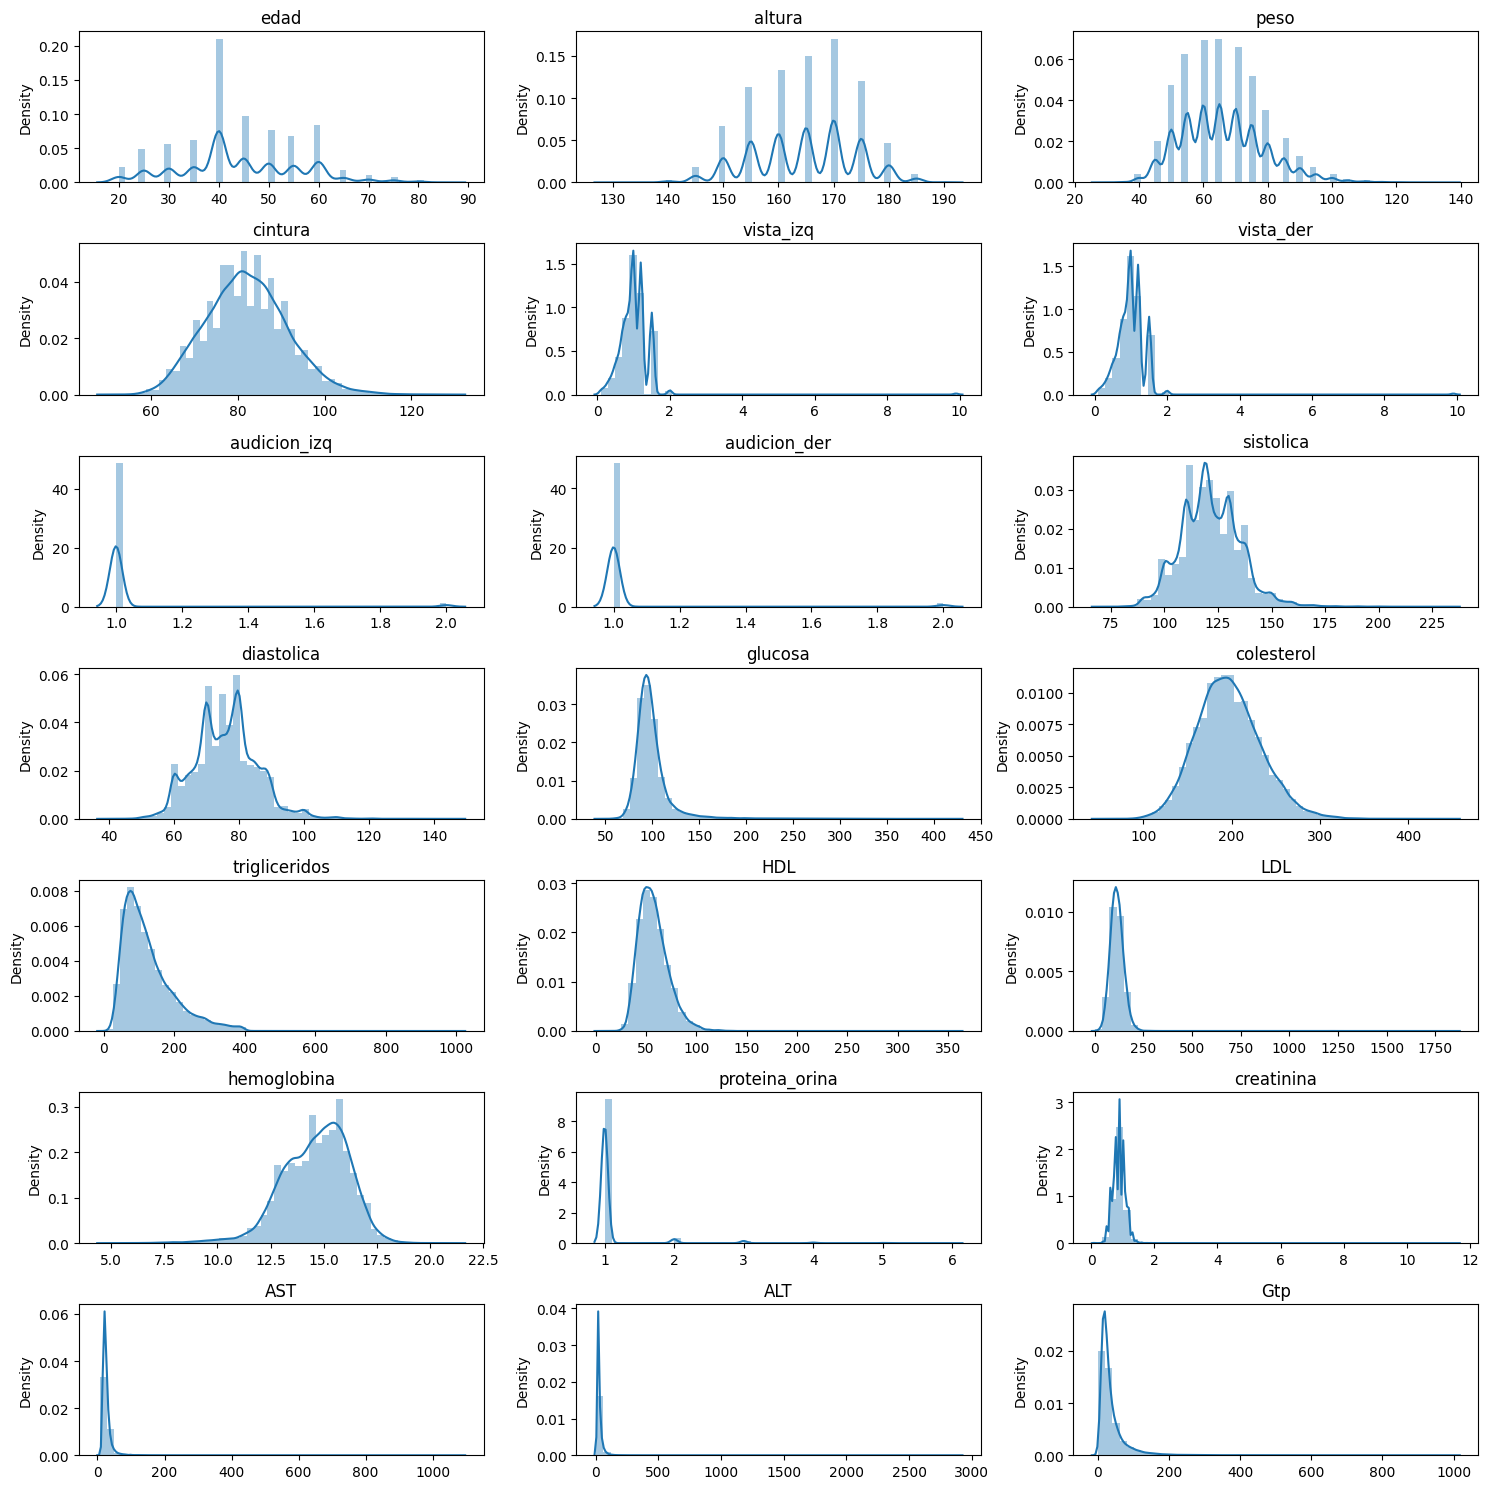

In [15]:
#df.hist(figsize=(16, 18), bins=40, xlabelsize=8, ylabelsize=8)

variables = ['edad', 'altura', 'peso', 'cintura', 'vista_izq', 'vista_der',
       'audicion_izq', 'audicion_der', 'sistolica', 'diastolica', 'glucosa',
       'colesterol', 'trigliceridos', 'HDL', 'LDL', 'hemoglobina',
       'proteina_orina', 'creatinina', 'AST', 'ALT', 'Gtp']

columns = 3

fig, axes = plt.subplots(len(variables) //columns, columns, figsize=(15,15))

for current_idx, variable in enumerate(variables):
    i = current_idx // columns
    j = current_idx % columns
    sns.distplot(df[variable], ax=axes[i][j])
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")

plt.tight_layout()


Las variables edad, altura, peso, cintura, sistólica, diastólica, glucosa,colesterol, HDL,LDL, hemoglobina y creatinina; parecen ser distribuciones normales pero por los outliers de éstas en algunas no se logra visualizar bien, como es el caso de las variables HDL, LDL y creatinina. Por lo que realizaré un análisis de Outliers y probablemente eliminaré algunos datos si éstos (unos pocos) son los culpables de outliers en muchas variables.


<Figure size 640x480 with 0 Axes>

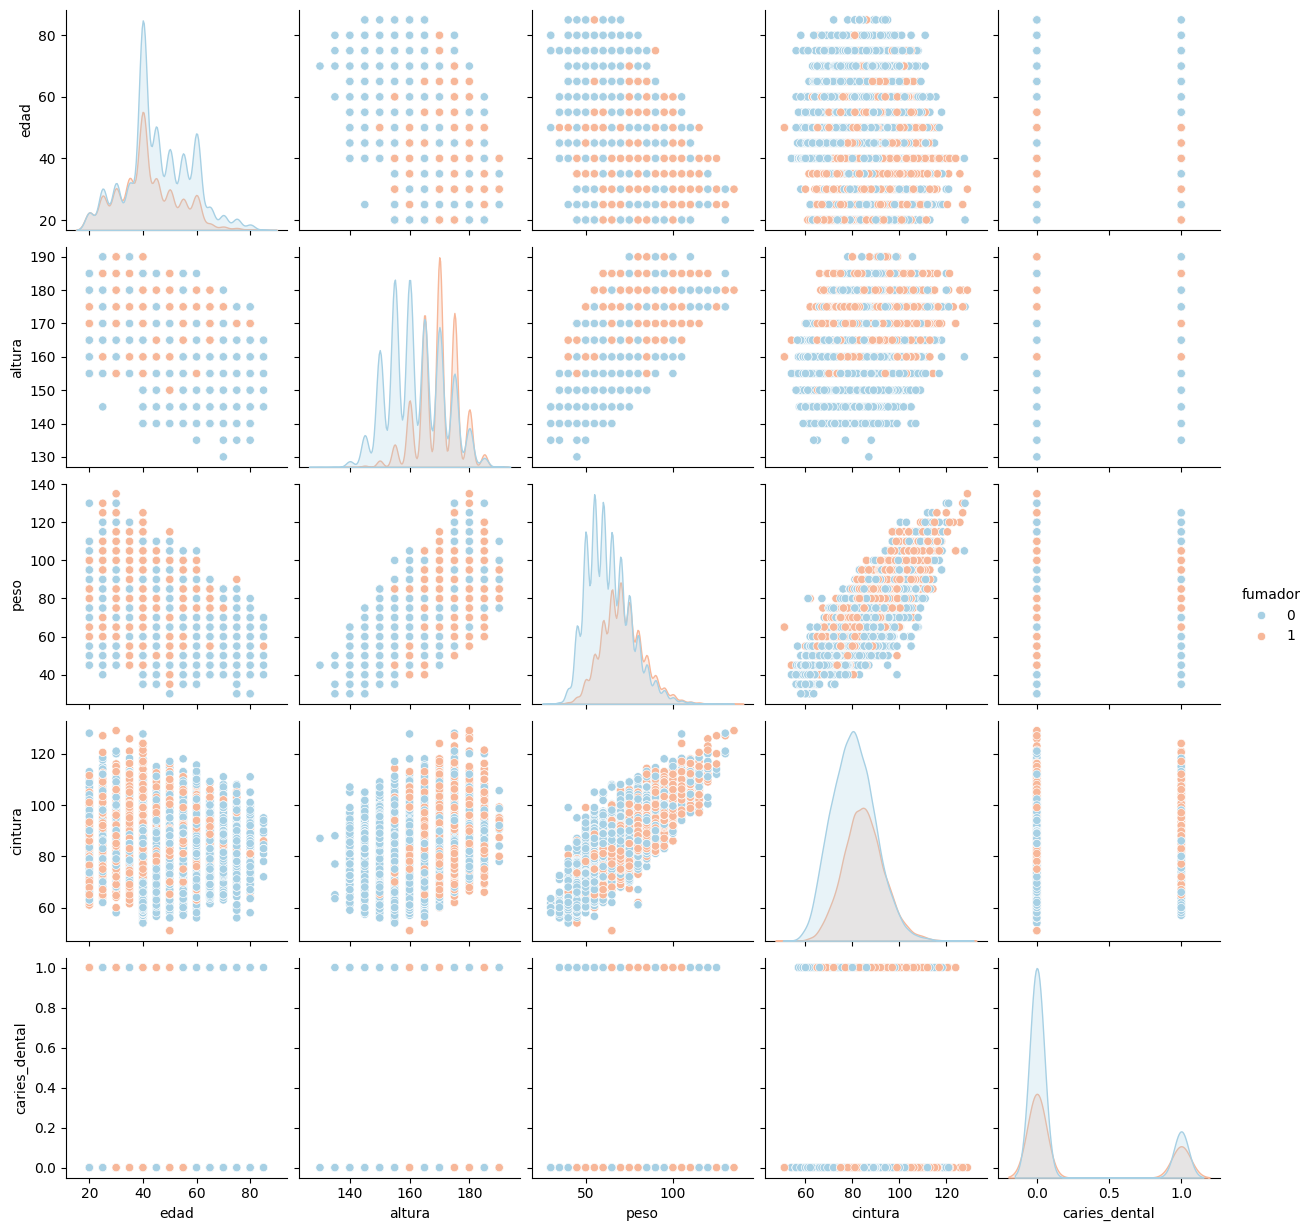

In [16]:
plotear=['edad', 'altura', 'peso', 'cintura', 'caries_dental','fumador']
      # , 'sistolica', 'diastolica', 'glucosa',
       #'colesterol', 'trigliceridos', 'HDL', 'LDL', 'hemoglobina',
     #  'proteina_orina', 'creatinina', 'AST', 'ALT', 'Gtp'
plt.figure()
sns.pairplot(data=df[plotear],hue='fumador',palette='RdBu_r')
plt.show()

Relación directa entre altura y peso, peso y cintura; relación inversa debil entre altura y edad

###Outliers

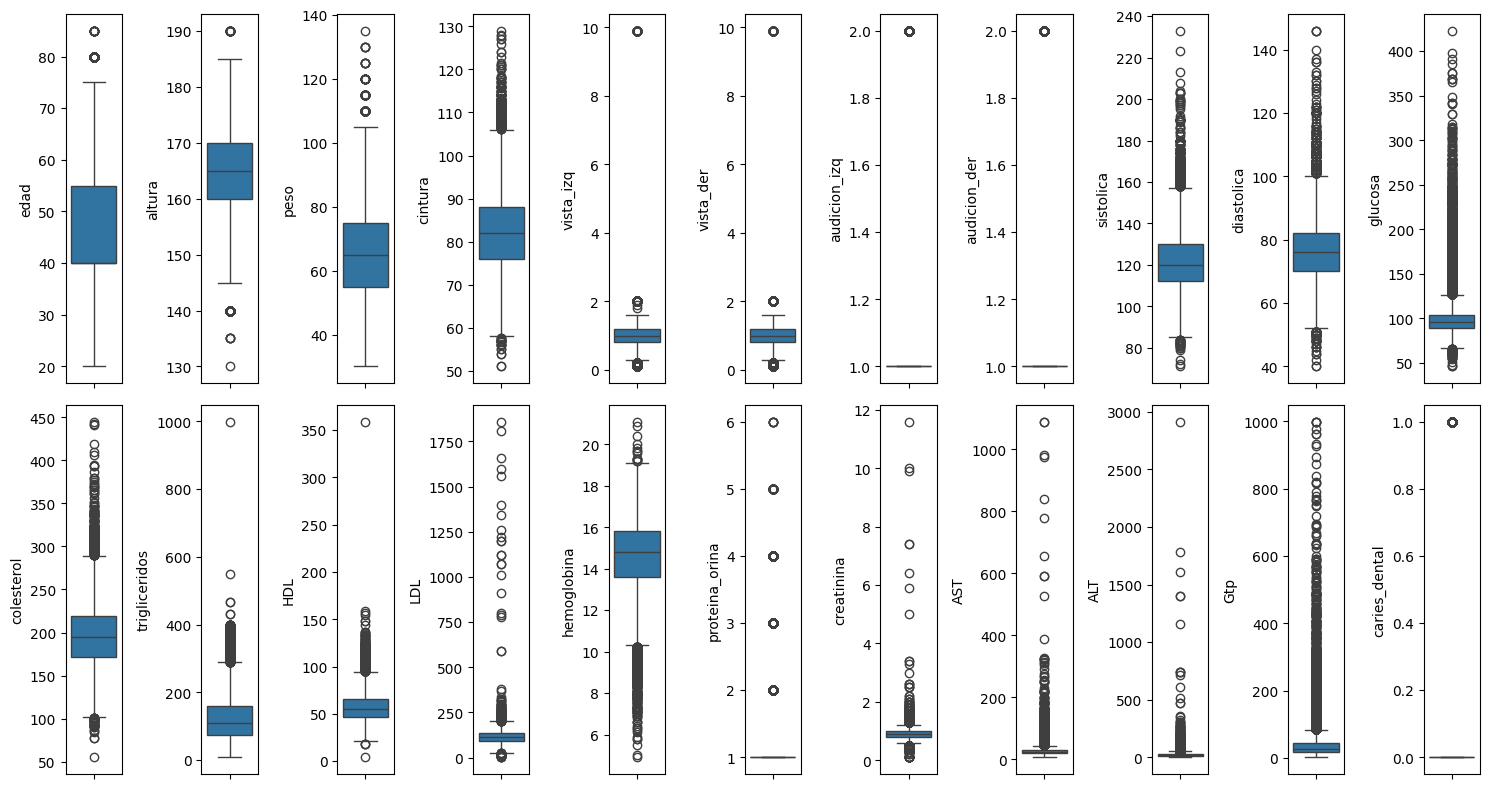

In [17]:
variables=['edad', 'altura', 'peso', 'cintura', 'vista_izq', 'vista_der',
       'audicion_izq', 'audicion_der', 'sistolica', 'diastolica', 'glucosa',
       'colesterol', 'trigliceridos', 'HDL', 'LDL', 'hemoglobina',
       'proteina_orina', 'creatinina', 'AST', 'ALT', 'Gtp','caries_dental']

fig, axes = plt.subplots(2,11, figsize=(15,8))

for ax, variable in zip (axes.ravel(), variables):
  ax=sns.boxplot(y=variable,data=df,ax=ax)

plt.tight_layout()


Voy a eliminar outliers que son extremadamente fuera de los rangos "normales" como en el caso de los triglicéridos, los valores superiores a 500 mg/dl. En el caso de la edad, voy a eliminar a las personas mayores a 75 años, ya que considero que los datos de las personas de edad superior a esa, pueden estar sesgadas por la salud deteriorada por su ancianidad. Y en el  

In [18]:
df=df[(df['edad']<75)]
df=df[(df['vista_izq']<9)]
df=df[(df['vista_der']<9)]
df=df[(df['trigliceridos']<500)]
df=df[(df['HDL']<250)]

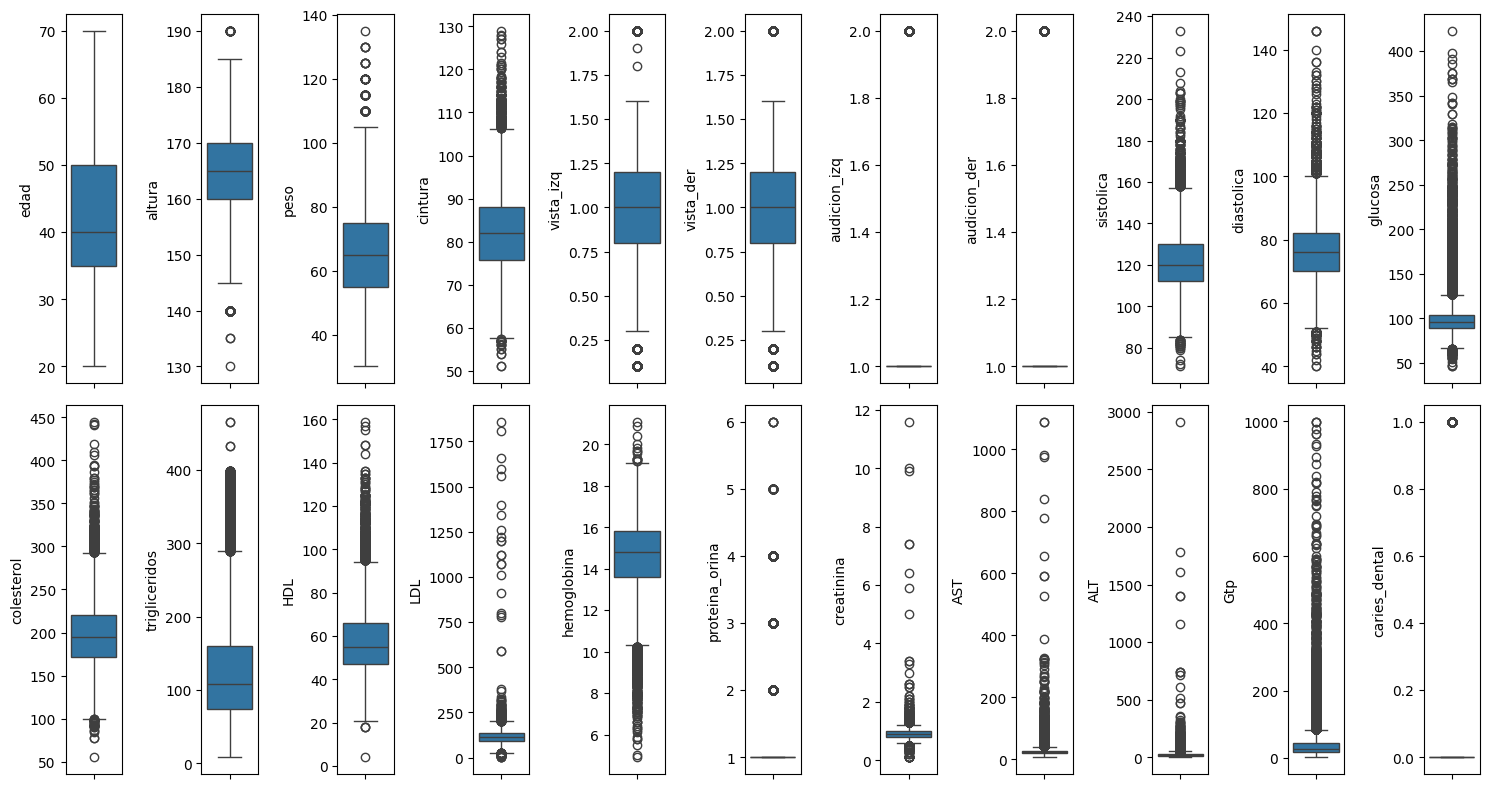

In [19]:
variables=['edad', 'altura', 'peso', 'cintura', 'vista_izq', 'vista_der',
       'audicion_izq', 'audicion_der', 'sistolica', 'diastolica', 'glucosa',
       'colesterol', 'trigliceridos', 'HDL', 'LDL', 'hemoglobina',
       'proteina_orina', 'creatinina', 'AST', 'ALT', 'Gtp','caries_dental']

fig, axes = plt.subplots(2,11, figsize=(15,8))

for ax, variable in zip (axes.ravel(), variables):
  ax=sns.boxplot(y=variable,data=df,ax=ax)

plt.tight_layout()

###Correlación

In [20]:
corrmat=df.corr()
corrmat

edad    altura      peso   cintura  vista_izq  vista_der  \
edad            1.000000 -0.481424 -0.322656 -0.041797  -0.303619  -0.303156   
altura         -0.481424  1.000000  0.672522  0.386005   0.230096   0.235895   
peso           -0.322656  0.672522  1.000000  0.831315   0.158547   0.162184   
cintura        -0.041797  0.386005  0.831315  1.000000   0.041696   0.044669   
vista_izq      -0.303619  0.230096  0.158547  0.041696   1.000000   0.694360   
vista_der      -0.303156  0.235895  0.162184  0.044669   0.694360   1.000000   
audicion_izq    0.158492 -0.069651 -0.042736  0.010608  -0.071511  -0.070901   
audicion_der    0.161484 -0.066283 -0.044037  0.007811  -0.077686  -0.078138   
sistolica       0.106533  0.095458  0.282544  0.322454  -0.022256  -0.015130   
diastolica      0.053328  0.115300  0.277682  0.297985   0.009190   0.016314   
glucosa         0.180263  0.021269  0.142183  0.213548  -0.060196  -0.065406   
colesterol      0.081185 -0.085590  0.024473  0.069490  -0.015377  -0.010027   
trigliceridos   0.022785  0.159501  0.327594  0.364207   0.026332   0.029048   
HDL             0.016027 -0.223057 -0.370905 -0.384148  -0.025938  -0.030426   
LDL             0.058145 -0.048196  0.037887  0.073978  -0.016091  -0.008960   
hemoglobina    -0.264903  0.537859  0.491721  0.388967   0.138166   0.142810   
proteina_orina  0.025133  0.005529  0.029609  0.041216  -0.026453  -0.021942   
creatinina     -0.129453  0.388774  0.327113  0.233037   0.079557   0.088506   
AST             0.026602  0.047551  0.127838  0.145374  -0.007842  -0.008465   
ALT            -0.063956  0.130385  0.254235  0.255283   0.033378   0.034189   
Gtp             0.013540  0.139307  0.212089  0.244129   0.005856   0.013173   
caries_dental  -0.115789  0.082540  0.078335  0.051206   0.019871   0.027529   
fumador        -0.156540  0.393836  0.299364  0.228374   0.089442   0.098939   

                audicion_izq  audicion_der  sistolica  diastolica  ...  \
edad                0.158492      0.161484   0.106533    0.053328  ...   
altura             -0.069651     -0.066283   0.095458    0.115300  ...   
peso               -0.042736     -0.044037   0.282544    0.277682  ...   
cintura             0.010608      0.007811   0.322454    0.297985  ...   
vista_izq          -0.071511     -0.077686  -0.022256    0.009190  ...   
vista_der          -0.070901     -0.078138  -0.015130    0.016314  ...   
audicion_izq        1.000000      0.483707   0.037514    0.008255  ...   
audicion_der        0.483707      1.000000   0.026663   -0.006275  ...   
sistolica           0.037514      0.026663   1.000000    0.765481  ...   
diastolica          0.008255     -0.006275   0.765481    1.000000  ...   
glucosa             0.035208      0.036822   0.171670    0.150945  ...   
colesterol         -0.015658     -0.015258   0.064406    0.092786  ...   
trigliceridos       0.009155      0.003637   0.202784    0.216008  ...   
HDL                -0.015674     -0.010980  -0.088997   -0.094632  ...   
LDL                -0.012375     -0.012193   0.019450    0.036798  ...   
hemoglobina        -0.022736     -0.026464   0.196539    0.237633  ...   
proteina_orina      0.016706      0.017489   0.045690    0.050109  ...   
creatinina         -0.004129     -0.001386   0.073720    0.093598  ...   
AST                 0.008497      0.012143   0.085091    0.086645  ...   
ALT                 0.003355      0.005133   0.098456    0.106917  ...   
Gtp                 0.008294      0.006863   0.171781    0.178660  ...   
caries_dental      -0.019131     -0.015651   0.036088    0.036982  ...   
fumador            -0.013589     -0.010393   0.079086    0.106005  ...   

                     HDL       LDL  hemoglobina  proteina_orina  creatinina  \
edad            0.016027  0.058145    -0.264903        0.025133   -0.129453   
altura         -0.223057 -0.048196     0.537859        0.005529    0.388774   
peso           -0.370905  0.037887     0.491721        0.029609    0.327113   
cintur

In [21]:
fig=px.imshow(corrmat,
              x=corrmat.columns,
              y=corrmat.columns,
              color_continuous_scale='RdBu_r',
              zmin=-1,
              zmax=1,
              aspect='auto',
              title='Matriz de Correlación')

fig.update_layout(
    width=1000,
    height=1000
)

fig.update_traces(text=corrmat.round(2),texttemplate='%{text}')

fig.show()

Correlación directa mayor a 0.4:

- altura / peso
- altura / hemoglobina
- peso / cintura
- peso / hemoglobina
- audicion_der / audicion_izq
- vista_izq / vista_der
- sistólica / diastólica
- LDL / colesterol
- ALT / AST
- hemoglobina / fumador

Correlación inversa mayor a -0.4:

- edad / altura
- trigliceridos / HDL

###Gráficos (Dataprep)

DataPrep Report
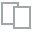
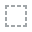
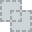
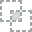
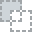
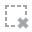
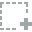
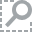
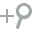
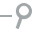
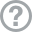
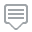
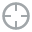
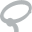
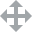
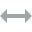
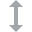
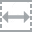
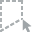
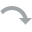
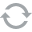
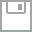
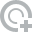
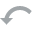
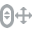
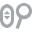
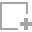
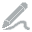
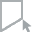
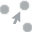
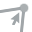
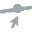

In [22]:
create_report(df)

###Relación entre Variable Target ('fumador') y el resto de las variables

In [39]:
variables_continuas=['cintura', 'sistolica', 'diastolica', 'glucosa', 'colesterol', 'trigliceridos', 'HDL', 'LDL', 'hemoglobina', 'creatinina', 'AST', 'ALT', 'Gtp']
variables_discretas=['edad', 'altura', 'peso', 'proteina_orina', 'vista_izq', 'vista_der', 'audicion_izq', 'audicion_der', 'caries_dental']

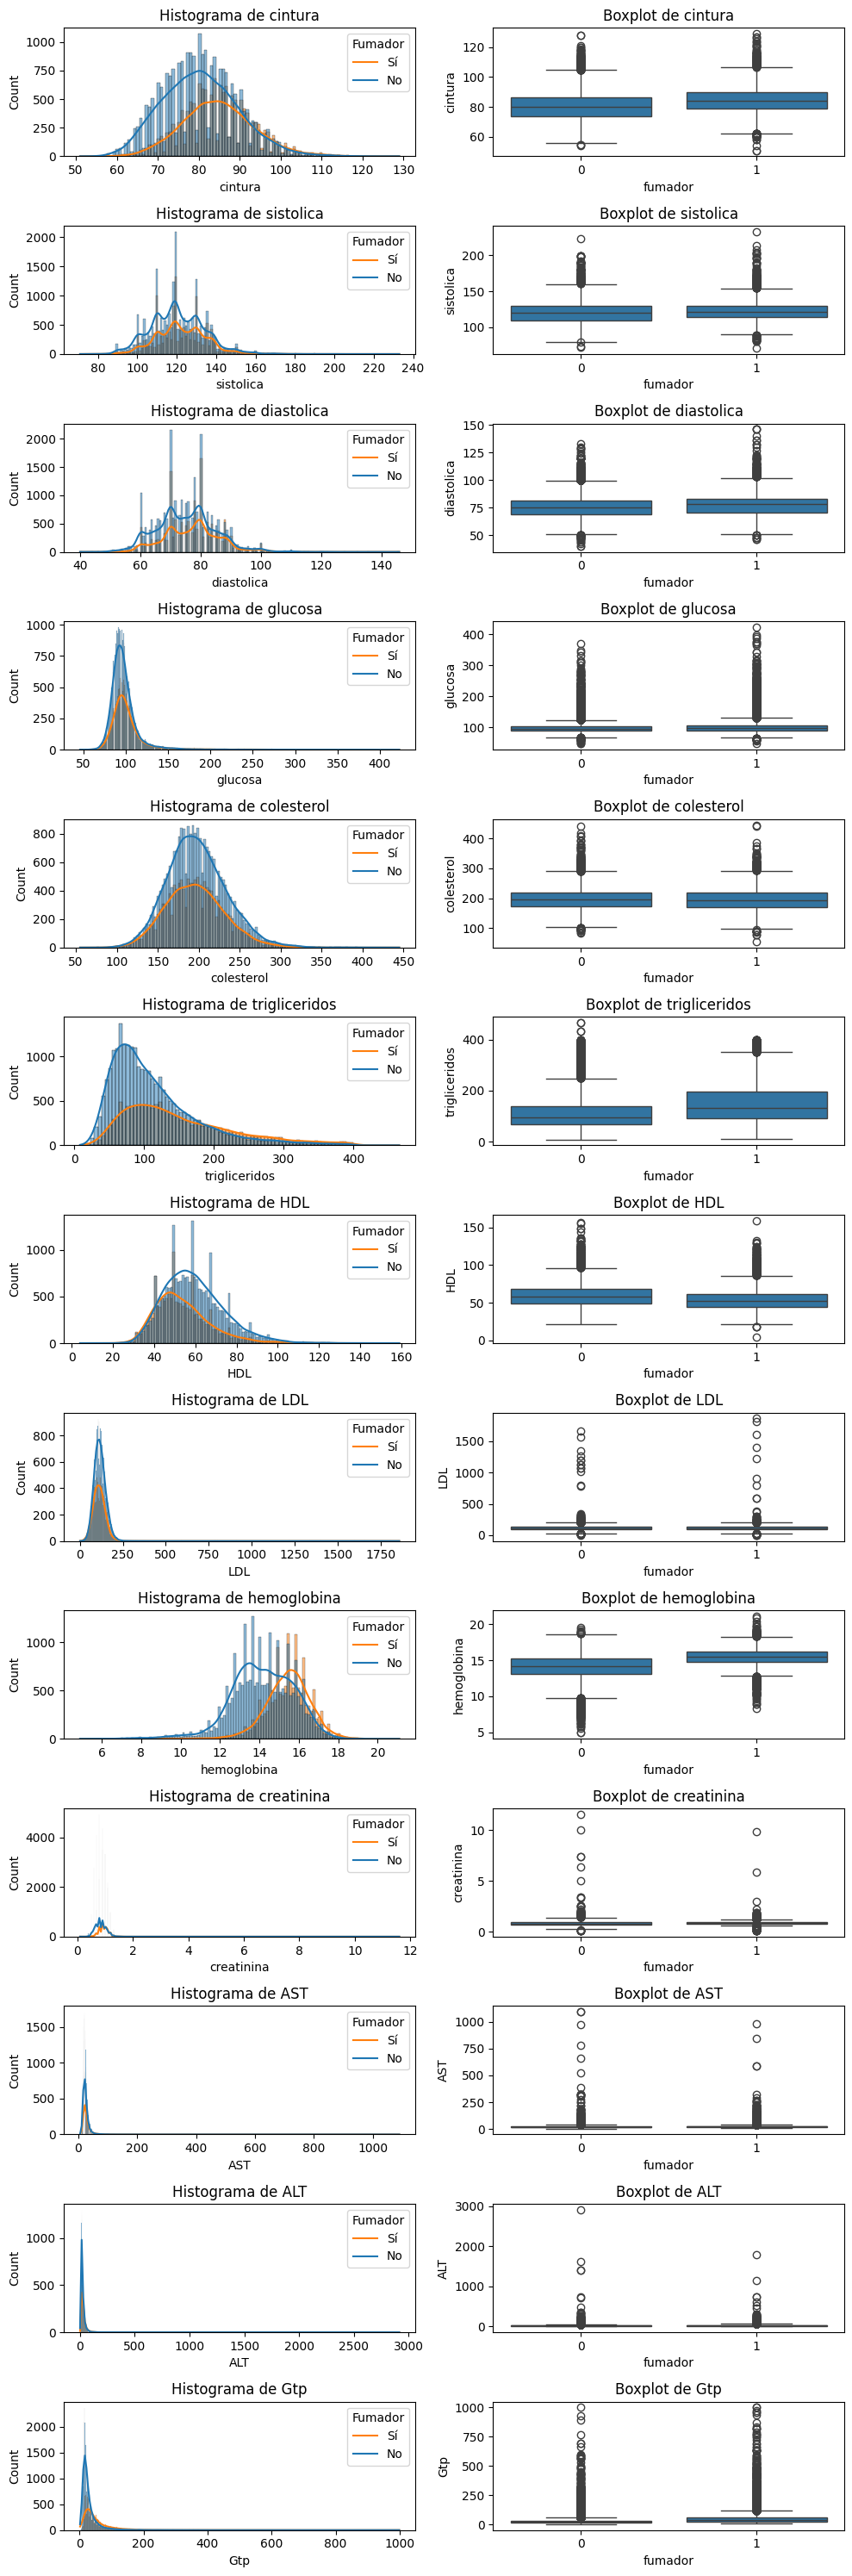

In [28]:
fig, axes = plt.subplots(len(variables_continuas), 2, figsize=(10, 30))

for i, var in enumerate(variables_continuas):
    sns.histplot(data=df, x=var, hue='fumador', ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histograma de {var}')
    axes[i, 0].legend(title='Fumador', labels=['Sí', 'No'])


    sns.boxplot(data=df, x='fumador', y=var, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot de {var}')

plt.tight_layout()

plt.show()

En estos gráficos no se evidencia diferencia entre fumadores y no fumadores, sólo en la frecuencia relativa, lo cual, tiene sentido, porque la variable fumador no está balanceada.

En el único caso en que se evidencia una diferencia es en la relación con la hemoglobina, en la que hablaré en las conclusiones.

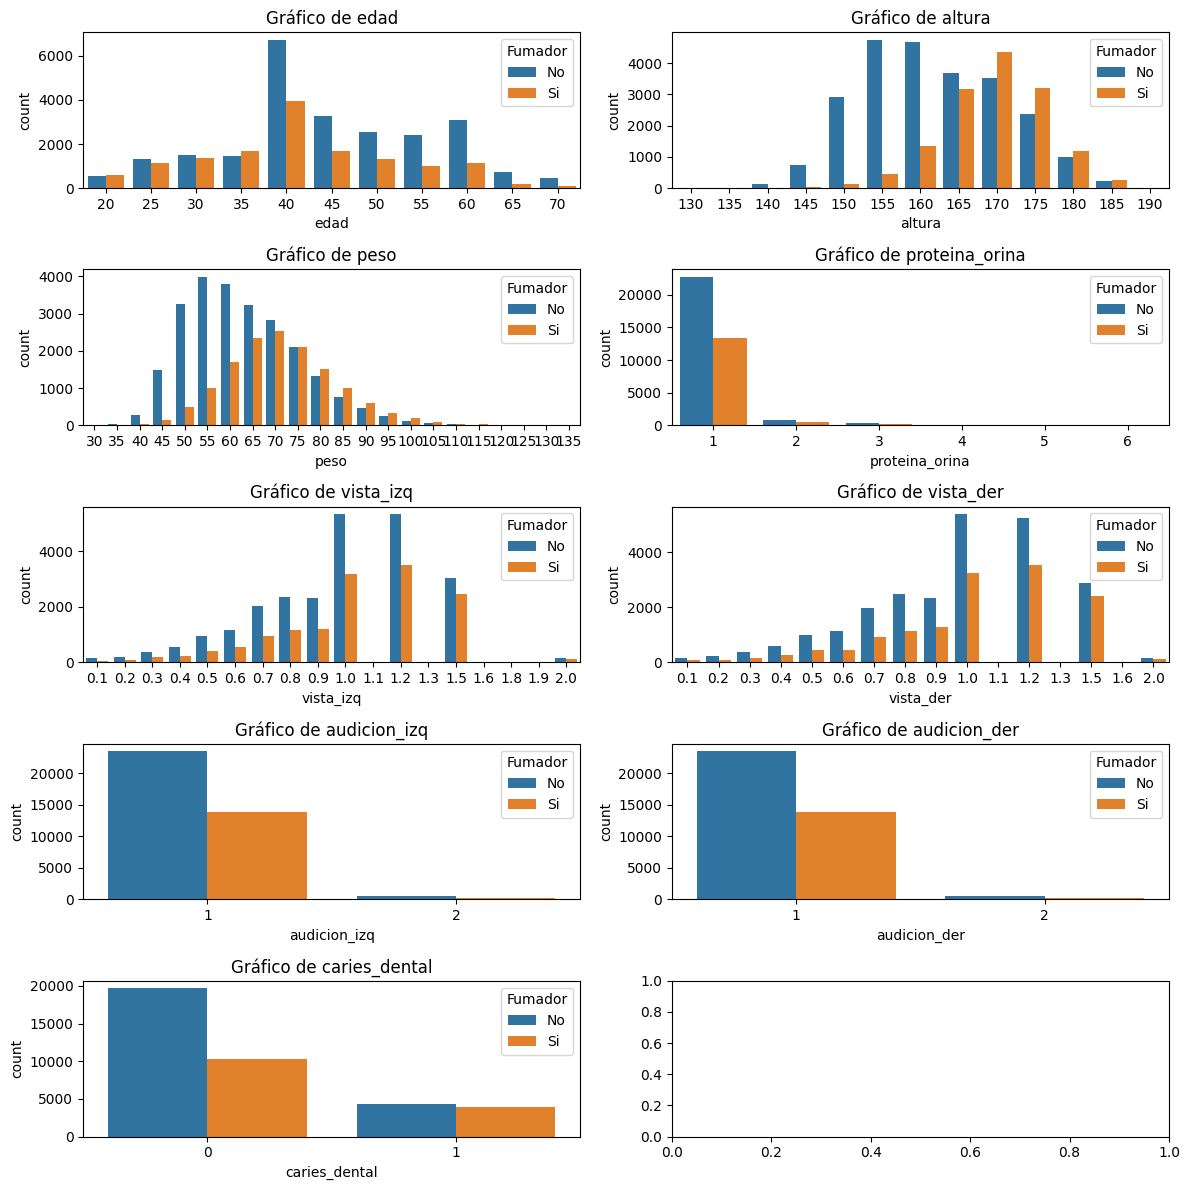

In [40]:
fig, axes = plt.subplots(5, 2, figsize=(12, 12))

for i, var in enumerate(variables_discretas):
    row, col = divmod(i, 2)
    sns.countplot(data=df, x=var, hue='fumador', ax=axes[row, col])
    axes[row, col].set_title(f'Gráfico de {var}')
    axes[row, col].legend(title='Fumador', labels=['No', 'Si'])



plt.tight_layout()

plt.show()

Con las variables discretas sucede lo mismo que con las continuas, hay una disminución de la frecuencia relativa, pero maneniendo la forma de la distribución; a excepción de la edad y la altura.

##Conclusiones

La unica relación directa entre ser fumador y otra variable que he encontrado antes de realizar un modelo predictivo es con la hemoglobina. Parece ser que en el caso de los fumadores tienden a tener la hemoglobina desde los valores normales hacia valores superiores; a diferencia de los no fumadores, donde los valores apenas van hacia arriba y la mayoria de los valores fuera de los normales son menores. Aún así, es dificil poder determinar solo con valores de hemoglobina, si el paciente es fumador o no.

Algo parecido sucede con la altura y el peso, que parecen estar relacionadas con la variable target 'fumador'. Al parecer las personas fumadoras tienden a ser mas altas y tener un mayor peso. Como sucede con la hemoglobina, si alguien dice que tiene una cierta altura y peso no se podría decir si es fumadora o no.

Este dataset no tiene discriminado los datos entre hombres y mujeres, por lo que, al ser registros biológicos, es muy importante esta diferencia; ya que, los valores normales entre hombres y mujeres varían. Esto podría ser un problema mas adelante.

Existen muchas variables con outliers, pero no pueden ser eliminados porque puede ser que las enfermedades que provocan los outliers estén relacionados con el tabaquismo.



# Bibliografía

###### Dataset: https://www.kaggle.com/datasets/gauravduttakiit/smoker-status-prediction/data

###### (1):https://pnsd.sanidad.gob.es/ciudadanos/informacion/tabaco/menuTabaco/riesgos.htm#:~:text=C%C3%A1ncer%20de%20pulm%C3%B3n.,trombosis%2C%20hemorragias%20o%20embolias).

###### (2):https://www.msdmanuals.com/es/professional/recursos/valores-normales-de-laboratorio/pruebas-de-sangre-valores-normales

###### (3):https://www.msdmanuals.com/es/professional/recursos/valores-normales-de-laboratorio/an%C3%A1lisis-de-orina-valores-normales

###### (4):https://www.nia.nih.gov/espanol/presion-arterial-alta/presion-arterial-alta-personas-mayores#:~:text=La%20presi%C3%B3n%20arterial%20normal%2C%20en,diast%C3%B3lica%20de%20menos%20de%2080.